In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

san = pd.read_csv('dane/san.csv', index_col=0, skiprows=2)
san['log_return'] = np.log1p(san.iloc[:,0].pct_change())
san = san.log_return
san.index = pd.to_datetime(san.index, format='%Y-%m-%d')
san.dropna(inplace=True)

ls = 100 * (1 - np.exp(san))
n = ls.size
train, test = ls.iloc[:int(n*0.8)], ls.iloc[int(n*0.8):]

# student t

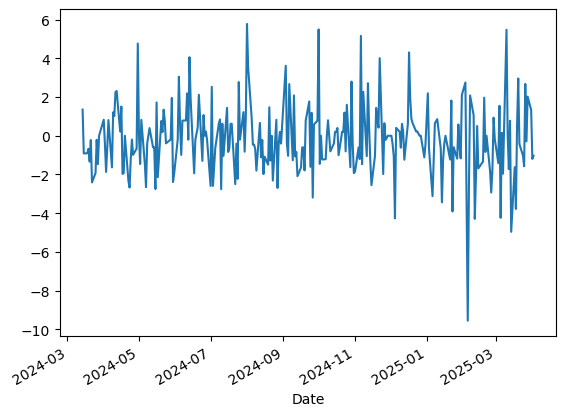

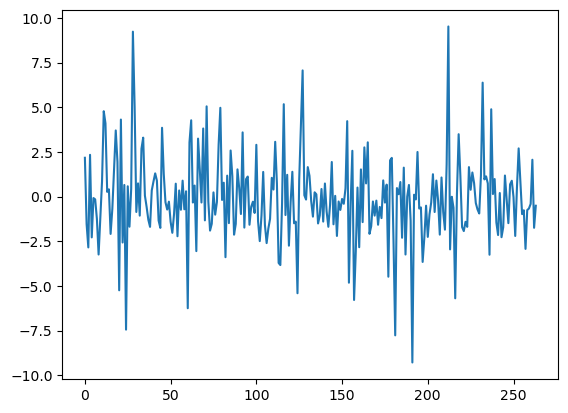

In [2]:
pred = []
for i in range(test.size):
    train = ls.iloc[i:int(n*0.8)+i]
    df, loc, scale = stats.t.fit(train)
    pred.append(stats.t.rvs(df) * scale + loc)
pred = np.array(pred)

test.plot()
plt.show()
plt.plot(np.arange(test.size),pred)
plt.show()

# normal

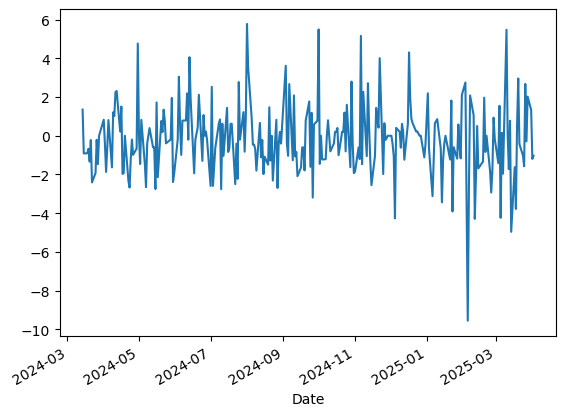

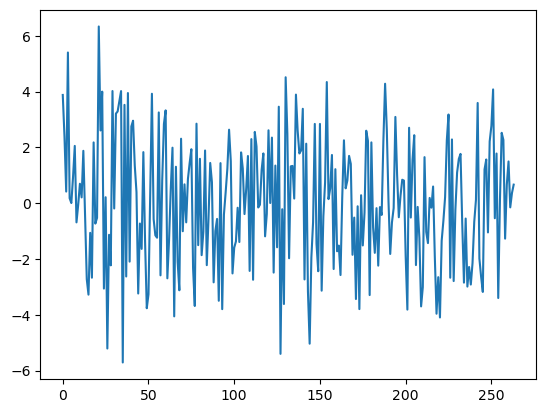

In [3]:
pred = []
for i in range(test.size):
    train = ls.iloc[i:int(n*0.8)+i]
    mu, std = stats.norm.fit(train)
    pred.append(stats.norm.rvs(mu, std))
pred = np.array(pred)

test.plot()
plt.show()
plt.plot(np.arange(test.size),pred)
plt.show()

# generalized extreme value

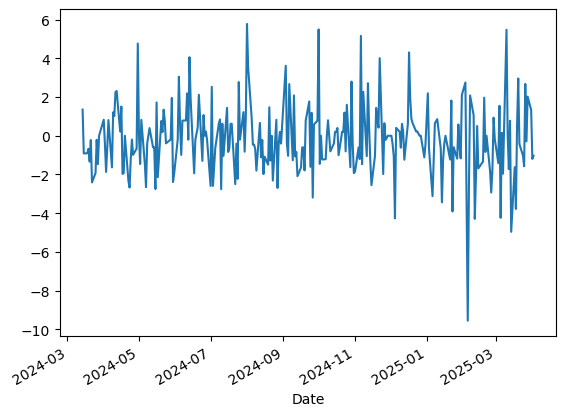

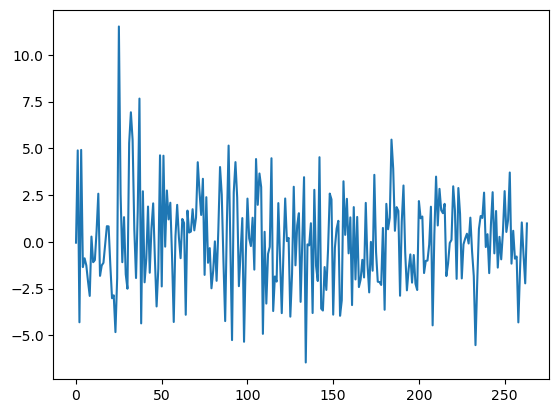

In [4]:
pred = []
for i in range(test.size):
    train = ls.iloc[i:int(n*0.8)+i]
    shape, loc, scale = stats.genextreme.fit(train)
    pred.append(stats.genextreme.rvs(shape) * scale + loc)
pred = np.array(pred)

test.plot()
plt.show()
plt.plot(np.arange(test.size),pred)
plt.show()

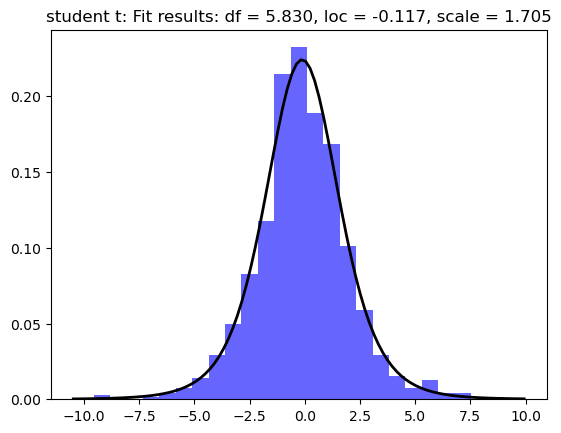

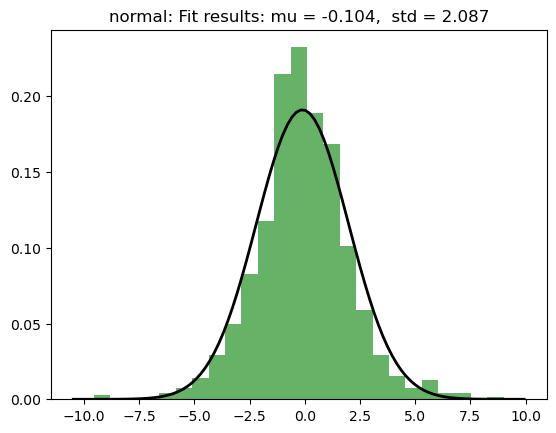

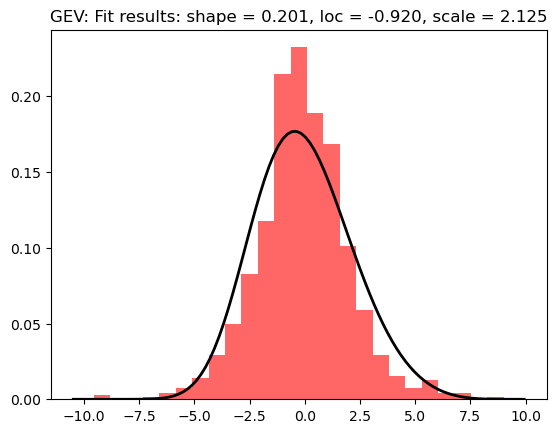

In [6]:
data = np.array(train)

df, loc, scale = stats.t.fit(data)

plt.hist(data, bins=25, density=True, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.t.pdf(x, df, loc, scale)
plt.plot(x, p, 'k', linewidth=2)
title = "student t: Fit results: df = %.3f, loc = %.3f, scale = %.3f" % (df, loc, scale)
plt.title(title)

plt.show()

mu, std = stats.norm.fit(data)

plt.hist(data, bins=25, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "normal: Fit results: mu = %.3f,  std = %.3f" % (mu, std)
plt.title(title)

plt.show()

shape, loc, scale = stats.genextreme.fit(data)

plt.hist(data, bins=25, density=True, alpha=0.6, color='r')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.genextreme.pdf(x, shape, loc, scale)
plt.plot(x, p, 'k', linewidth=2)
title = "GEV: Fit results: shape = %.3f, loc = %.3f, scale = %.3f" % (shape, loc, scale)
plt.title(title)
plt.show()